In [32]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing nltk libraries
import nltk
#nltk.download('all')
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,precision_score, confusion_matrix, accuracy_score,classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
#loading the data into a dataframe
df = pd.read_csv(r"C:\Users\Admin\Google Drive\Download\flipkart_reviews.csv")
df

,Unnamed: 0,Review_title,Reiew_text,Ratings
0,0,Perfect product!,"Design you find top of the line , fully metall...",5
1,1,Wonderful,In this prize range few laptops are coming. It...,4
2,2,Terrific,"VERY good performance and super look, good bat...",5
3,3,Terrific purchase,Awesome product and performance it is the chea...,5
4,4,Simply awesome,A very nice and light laptop with great perfor...,5
...,...,...,...,...
33687,33687,Perfect product!,Very good quality product,5
33688,33688,Don't waste your money,"This is an OEM hard disk, hence if it goes fau...",1
33689,33689,Not recommended at all,damaged product fraud cheating,1
33690,33690,Absolute rubbish!,Third class product plz don't shop in flip cart,1


In [34]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [35]:
#checking the shape
df.shape

(33692, 3)

In [36]:
#checking column names
print("Columns :", df.columns)

Columns : Index(['Review_title', 'Reiew_text', 'Ratings'], dtype='object')


In [37]:
#data types
df.dtypes

Review_title    object
Reiew_text      object
Ratings          int64
dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33692 entries, 0 to 33691
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  33692 non-null  object
 1   Reiew_text    33692 non-null  object
 2   Ratings       33692 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 789.8+ KB


In [39]:
df.isna().sum()

Review_title    0
Reiew_text      0
Ratings         0
dtype: int64

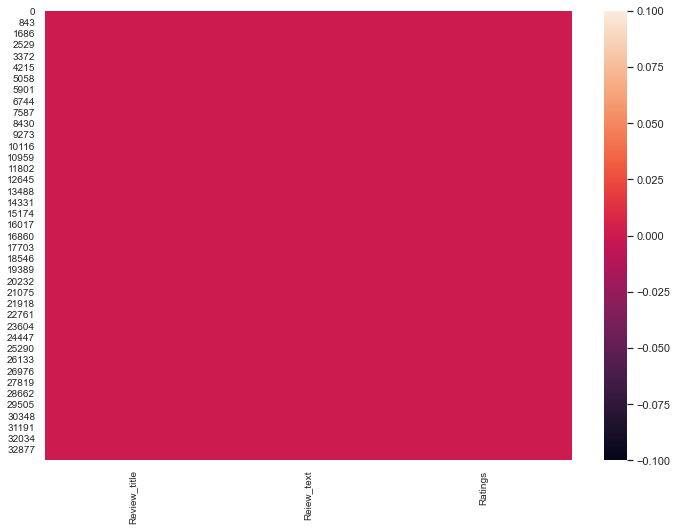

In [40]:
#Visualization of missing values
sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

In [41]:
#Drop the rows where review_title and Reiew_text has null values
df.dropna(subset=['Review_title','Reiew_text'], inplace=True)

In [42]:
#checking for null values again
df.isnull().sum()

Review_title    0
Reiew_text      0
Ratings         0
dtype: int64

In [43]:
df['Ratings'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [44]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')

In [45]:
#joining Review text and title
df['Review'] = df['Review_title'].map(str)+' '+df['Reiew_text']

In [46]:
#lets have a look at our data now
df

,Review_title,Reiew_text,Ratings,Review
0,Perfect product!,"Design you find top of the line , fully metall...",5,Perfect product! Design you find top of the li...
1,Wonderful,In this prize range few laptops are coming. It...,4,Wonderful In this prize range few laptops are ...
2,Terrific,"VERY good performance and super look, good bat...",5,"Terrific VERY good performance and super look,..."
3,Terrific purchase,Awesome product and performance it is the chea...,5,Terrific purchase Awesome product and performa...
4,Simply awesome,A very nice and light laptop with great perfor...,5,Simply awesome A very nice and light laptop wi...
...,...,...,...,...
33687,Perfect product!,Very good quality product,5,Perfect product! Very good quality product
33688,Don't waste your money,"This is an OEM hard disk, hence if it goes fau...",1,Don't waste your money This is an OEM hard dis...
33689,Not recommended at all,damaged product fraud cheating,1,Not recommended at all damaged product fraud c...
33690,Absolute rubbish!,Third class product plz don't shop in flip cart,1,Absolute rubbish! Third class product plz don'...


In [47]:
df['Review'][0]

'Perfect product! Design you find top of the line , fully metallic body amazing trackpad.Display is great with 100% sRGB and 72%ntsc.Perfect laptop for official use and for coding purposes . Its 1.48kg weight is ideal for a college student carrying everyday this device to college.Ty INFINIX and FLIPKART.'

In [48]:
df['Review'][1]

"Wonderful In this prize range few laptops are coming. It's performers is very good define, screen, but about battery, it is about to 7 to 8 or 9 hour. It dependents on your work. You can play some old games like about under 2015. ENJOY 😊😊👍👍"

In [49]:
df['Review'][2]

'Terrific VERY good performance and super look, good battery backup 🔋, metal body, nice everything'

In [50]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [51]:
#Lowercasing
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

#removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [52]:
df['Review'][0]

'perfect product design you find top of the line  fully metallic body amazing trackpaddisplay is great with 100 srgb and 72ntscperfect laptop for official use and for coding purposes  its 148kg weight is ideal for a college student carrying everyday this device to collegety infinix and flipkart'

In [53]:
df['Review'][1]

'wonderful in this prize range few laptops are coming it is performers is very good define screen but about battery it is about to 7 to 8 or 9 hour it dependents on your work you can play some old games like about under 2015 enjoy '

In [55]:
nltk.download('stopwords')
#Remove stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [56]:
df['Review'][0]

'perfect product design find top line fully metallic body amazing trackpaddisplay great 100 srgb 72ntscperfect laptop official use coding purposes 148kg weight ideal college student carrying everyday device collegety infinix flipkart'

In [57]:
df['Review'][1]

'wonderful prize range laptops coming performers good define screen battery 7 8 9 hour dependents work play old games like 2015 enjoy'

In [58]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [59]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [60]:
df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [61]:
df['Review'][0]

'perfect product design find top line fully metallic body amazing trackpaddisplay great 100 srgb 72ntscperfect laptop official use coding purposes 148kg weight ideal college student carrying everyday device collegety infinix flipkart'

In [62]:
df['Review'][1]

'wonderful prize range laptops coming performers good define screen battery 7 8 9 hour dependents work play old games like 2015 enjoy'

In [63]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [64]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [65]:
df['Review'][0]

'perfect product design find top line fully metallic body amazing trackpaddisplay great  srgb ntscperfect laptop official use coding purposes kg weight ideal college student carrying everyday device collegety infinix flipkart'

In [66]:
df['Review'][1]

'wonderful prize range laptops coming performers good define screen battery    hour dependents work play old games like  enjoy'

In [67]:
#creating column for word counts in the text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC','Review']].head()

,Review_WC,Review
0,31,perfect product design find top line fully met...
1,22,wonderful prize range laptops coming performer...
2,12,terrific good performance super look good batt...
3,14,terrific purchase awesome product performance ...
4,24,simply awesome nice light laptop great perform...


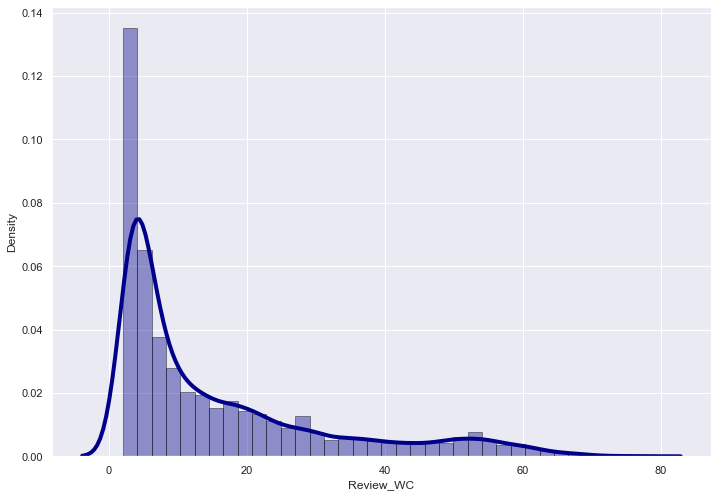

In [68]:
#density plot and histogram of all word count
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [69]:
#creating column for character counts in the text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head()

,Review_CC,Review
0,224,perfect product design find top line fully met...
1,125,wonderful prize range laptops coming performer...
2,83,terrific good performance super look good batt...
3,104,terrific purchase awesome product performance ...
4,141,simply awesome nice light laptop great perform...


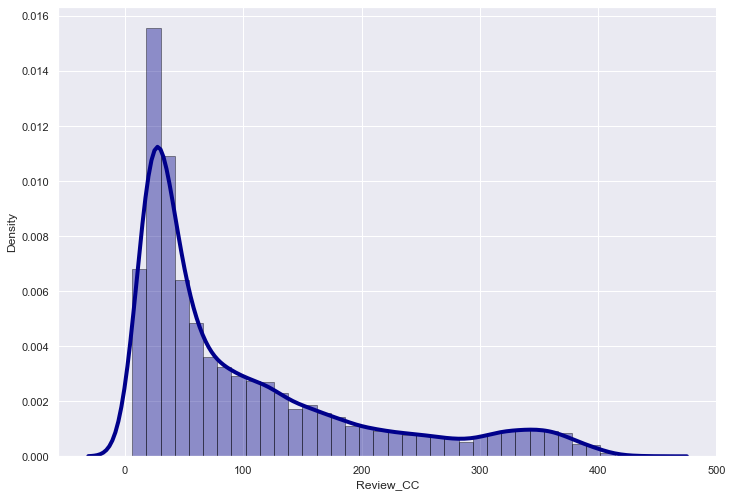

In [70]:
#density plot and histogram of all character count
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [71]:
#apply zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(33453, 6)

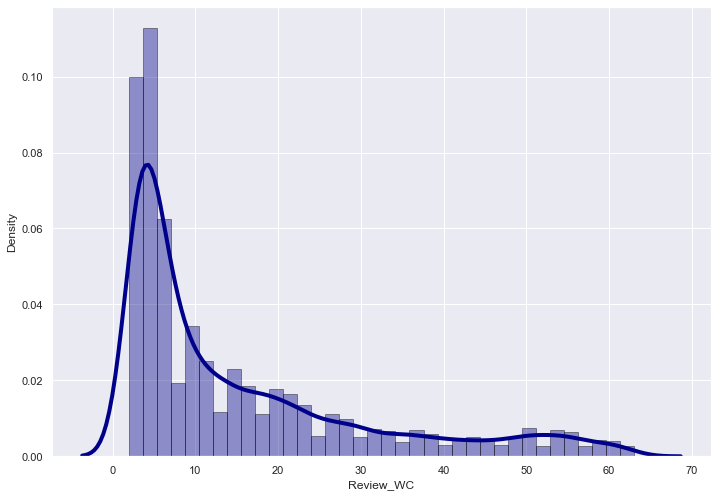

In [72]:
#density plot and histogram of all word count
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

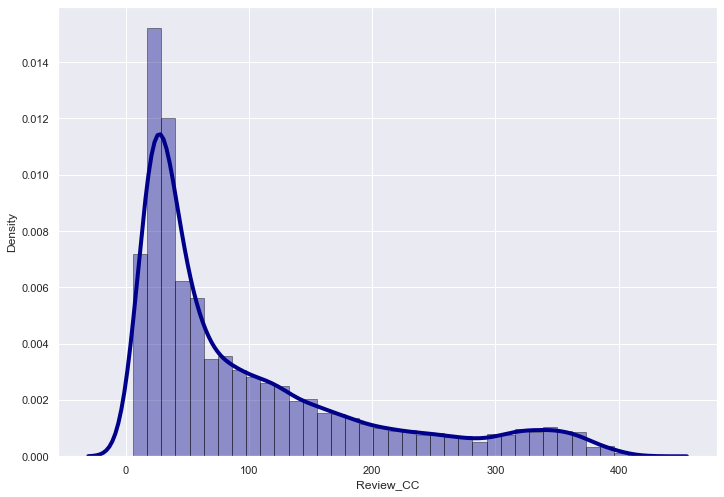

In [73]:
#density plot and histogram of all word count
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [74]:
#lets have a look at our data set
df

,Review_title,Reiew_text,Ratings,Review,Review_WC,Review_CC
0,Perfect product!,"Design you find top of the line , fully metall...",5,perfect product design find top line fully met...,31,224
1,Wonderful,In this prize range few laptops are coming. It...,4,wonderful prize range laptops coming performer...,22,125
2,Terrific,"VERY good performance and super look, good bat...",5,terrific good performance super look good batt...,12,83
3,Terrific purchase,Awesome product and performance it is the chea...,5,terrific purchase awesome product performance ...,14,104
4,Simply awesome,A very nice and light laptop with great perfor...,5,simply awesome nice light laptop great perform...,24,141
...,...,...,...,...,...,...
33687,Perfect product!,Very good quality product,5,perfect product good quality product,5,36
33688,Don't waste your money,"This is an OEM hard disk, hence if it goes fau...",1,waste money oem hard disk hence goes faulty re...,21,126
33689,Not recommended at all,damaged product fraud cheating,1,recommended damaged product fraud cheating,5,42
33690,Absolute rubbish!,Third class product plz don't shop in flip cart,1,absolute rubbish third class product plz shop ...,9,55


5    19870
4     6746
1     3580
3     2314
2      943
Name: Ratings, dtype: int64


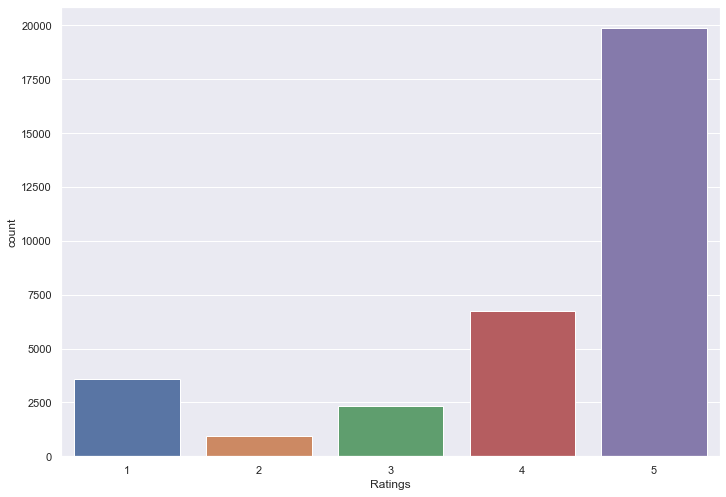

In [75]:
#Check the count of target column
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

In [76]:
#shuffling the data set
df = df.sample(frac=1).reset_index(drop=True)

In [77]:
df

,Review_title,Reiew_text,Ratings,Review,Review_WC,Review_CC
0,Worth every penny,amazing battery backup..getting upto 12 days o...,5,worth every penny amazing battery backupgettin...,27,204
1,Fair,Features are so much but all notification are ...,3,fair features much notification commonly showi...,53,358
2,Terrific purchase,"Very good product, all is perfect",5,terrific purchase good product perfect,5,38
3,Just wow!,ok,5,wow ok,2,6
4,Bad quality,No Replacement and return policy for this prod...,2,bad quality replacement return policy product ...,39,277
...,...,...,...,...,...,...
33448,Very Good,It's amazing,4,good amazing,2,12
33449,Great product,A good phone in the budget of 15k- 20k with a ...,5,great product good phone budget k k better pro...,46,294
33450,Good,Very good,3,good good,2,9
33451,Terrible product,Totally disappointed. Activity tracker is a di...,1,terrible product totally disappointed activity...,37,257


In [78]:
#selct data from every category
df1 = df[df['Ratings']==1][0:7356]
df2 = df[df['Ratings']==2][0:7356]
df3 = df[df['Ratings']==3][0:7356]
df4 = df[df['Ratings']==4][0:7356]
df5 = df[df['Ratings']==5][0:7356]

In [79]:
#Combining all the dataframes into one and shuffling them 
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Reiew_text,Ratings,Review,Review_WC,Review_CC
0,Does the job,Finger print sensor does not work properly\nEv...,3,job finger print sensor work properly every th...,10,60
1,Delightful,Good compact laptop. Huge space. -1 star for 4...,4,delightful good compact laptop huge space sta...,12,78
2,Decent product,Worth the price and blue color looks way bette...,3,decent product worth price blue color looks wa...,14,95
3,Excellent,Best product in affordable price. Very satisfy...,5,excellent best product affordable price satisf...,35,246
4,Wonderful,I am happy to share the experience about realm...,4,wonderful happy share experience realme narzo ...,50,326
...,...,...,...,...,...,...
20934,Don't waste your money,Don't buy it waste of money i feel like I have...,1,waste money buy waste money feel like cheated ...,37,243
20935,Pretty good,Nice monitor,4,pretty good nice monitor,4,24
20936,Horrible,So bad,1,horrible bad,2,12
20937,Value-for-money,One of the best laptop for this values.,4,valueformoney one best laptop values,5,36


In [80]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

In [81]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

In [82]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

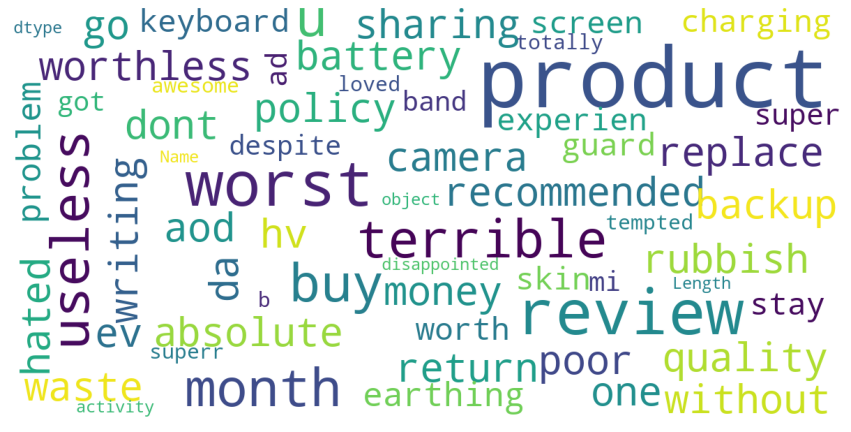

In [83]:
show_wordcloud(df1['Review'])

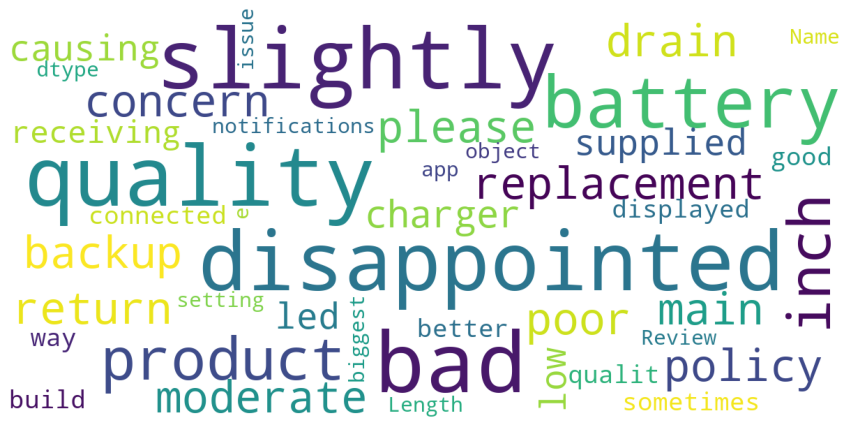

In [84]:
show_wordcloud(df2['Review'])

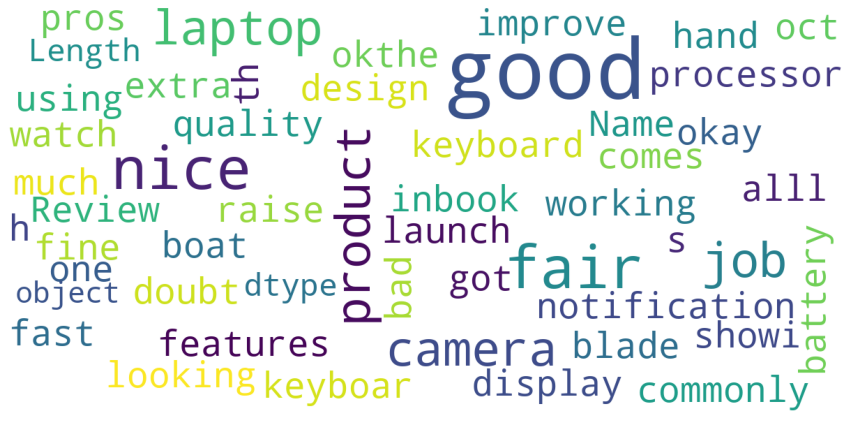

In [85]:
show_wordcloud(df3['Review'])

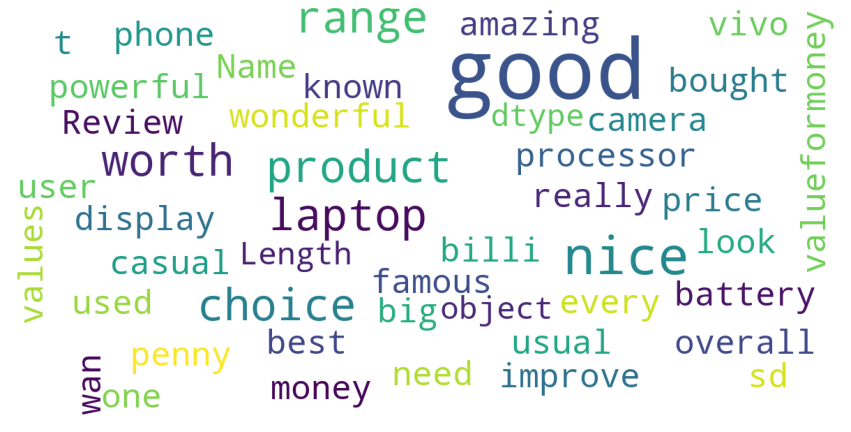

In [86]:
show_wordcloud(df4['Review'])

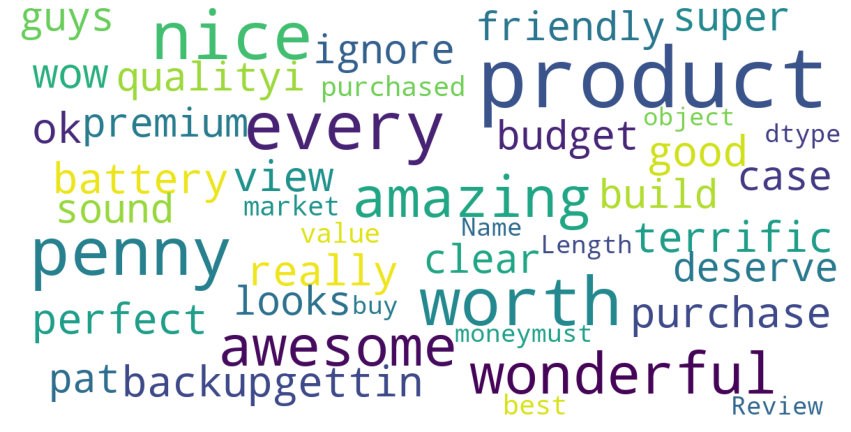

In [87]:
show_wordcloud(df5['Review'])

In [88]:
#separating features and labels
x = df['Review']
y = df['Ratings']

In [89]:
#using the n_gram tfidf vectorizer(Word vectors)
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [90]:
#Character vectors
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [91]:
#I will combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features,train_word_features])

In [92]:
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

In [93]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (15704, 150000)
x_test (5235, 150000)
y_train (15704,)
y_test (5235,)


In [95]:
#defining the algorithms
rf = RandomForestClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
xgb = XGBClassifier(verbosity=0)
bnb = BernoulliNB()
sgd = SGDClassifier()

In [96]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [97]:
for model in [lr,svc,bnb,mnb,sgd,rf,xgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 96.19866284622731
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       864
           2       0.99      0.90      0.95       211
           3       0.98      0.91      0.94       566
           4       0.93      0.96      0.95      1686
           5       0.97      0.97      0.97      1908

    accuracy                           0.96      5235
   macro avg       0.97      0.95      0.96      5235
weighted avg       0.96      0.96      0.96      5235

Confusion Matrix : 
 [[ 857    0    1    4    2]
 [   8  190    3   10    0]
 [   2    1  513   45    5]
 [   0    0    6 1624   56]
 [   1    0    1   54 1852]]

******************************LinearSVC******************************
Accuracy Score: 96.73352435530086
---------------------------------------------------
C

In [98]:
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)

In [99]:
#lets selects different parameters for tuning
grid_params = {
                'penalty':['l2'],
                'loss':['hinge','squared_hinge'],
                'multi_class': ['ovr'],
                'intercept_scaling':[2,3],
                'dual':[True,False],
                }

In [100]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(svc, grid_params, cv = 3, verbose=10)
GCV.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2
[CV 1/3; 1/8] END dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2;, score=0.959 total time=  11.7s
[CV 2/3; 1/8] START dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2
[CV 2/3; 1/8] END dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2;, score=0.961 total time=  19.2s
[CV 3/3; 1/8] START dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2
[CV 3/3; 1/8] END dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2;, score=0.959 total time=  16.5s
[CV 1/3; 2/8] START dual=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l2
[CV 1/3; 2/8] END dual=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l2;, score=0.956 total time=  10.6s
[CV 2/3; 2/8] START dual=True, intercept_scaling=2, loss=squared

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'dual': [True, False], 'intercept_scaling': [2, 3],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr'], 'penalty': ['l2']},
             verbose=10)

In [101]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'dual': True,
 'intercept_scaling': 2,
 'loss': 'hinge',
 'multi_class': 'ovr',
 'penalty': 'l2'}

In [102]:
#training and testing our final model with above parameters
model = LinearSVC(dual = True, intercept_scaling = 2, loss = 'hinge', multi_class = 'ovr', penalty = 'l2')
model.fit(x_train,y_train) #fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

#printing accuracy score
print("Accuracy Score :", accuracy)

#printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

#printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score : 96.71442215854823

Confusion Matrix : 
 [[ 862    0    0    2    0]
 [   6  194    2    9    0]
 [   5    2  519   35    5]
 [   0    0   12 1624   50]
 [   1    0    1   42 1864]]


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       864
           2       0.99      0.92      0.95       211
           3       0.97      0.92      0.94       566
           4       0.95      0.96      0.96      1686
           5       0.97      0.98      0.97      1908

    accuracy                           0.97      5235
   macro avg       0.97      0.95      0.96      5235
weighted avg       0.97      0.97      0.97      5235



In [104]:
import joblib
joblib.dump(model,"Rating_Prediction_Project.pkl")

['Rating_Prediction_Project.pkl']